In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Read all the files
# Put them in a dictionary


# Set the path to the folder containing your CSV files
path = r'OrigialDataset'

# Dictionary to store data
data = {}

# Loop through files in the directory
for root, dirs, files in os.walk(path):
    # Print out the directories and files to debug the structure
    print(f"Root: {root}")
    print(f"Dirs: {dirs}")
    print(f"Files: {files}")
    
    for file in files:
        # Check if the file is a CSV file
        if file.endswith('.csv'):
            fname = file.split('.')[0]  # Get the filename without extension
            file_path = os.path.join(root, file)  # Full path to the file
            try:
                # Read the CSV and add it to the dictionary
                data[fname] = pd.read_csv(file_path)
                print(f"Loaded: {fname}")  # Optional: Print to track which file is loaded
            except Exception as e:
                print(f"Error reading {file}: {e}")

# Check the loaded dictionary
print(f"Loaded datasets: {list(data.keys())}")


Root: OrigialDataset
Dirs: []
Files: ['acquisition_samples.csv', 'agricultural_samples.csv', 'all_downloaded_table_record_counts.csv', 'branded_food.csv', 'fndds_derivation.csv', 'fndds_ingredient_nutrient_value.csv', 'food.csv', 'food_attribute.csv', 'food_attribute_type.csv', 'food_calorie_conversion_factor.csv', 'food_category.csv', 'food_component.csv', 'food_data.ipynb', 'food_nutrient.csv', 'food_nutrient_conversion_factor.csv', 'food_nutrient_derivation.csv', 'food_nutrient_source.csv', 'food_portion.csv', 'food_protein_conversion_factor.csv', 'food_update_log_entry.csv', 'foundation_food.csv', 'input_food.csv', 'lab_method.csv', 'lab_method_code.csv', 'lab_method_nutrient.csv', 'market_acquisition.csv', 'measure_unit.csv', 'nutrient.csv', 'nutrient_incoming_name.csv', 'retention_factor.csv', 'sample_food.csv', 'sr_legacy_food.csv', 'sub_sample_food.csv', 'sub_sample_result.csv', 'survey_fndds_food.csv', 'wweia_food_category.csv']
Loaded: acquisition_samples
Loaded: agricultural

C:\Users\DELL\AppData\Local\Temp\ipykernel_21800\2781453944.py:25: DtypeWarning: Columns (2,3,4,6,9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data[fname] = pd.read_csv(file_path)


Loaded: branded_food
Loaded: fndds_derivation


C:\Users\DELL\AppData\Local\Temp\ipykernel_21800\2781453944.py:25: DtypeWarning: Columns (2,3,6,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data[fname] = pd.read_csv(file_path)


Loaded: fndds_ingredient_nutrient_value
Loaded: food


C:\Users\DELL\AppData\Local\Temp\ipykernel_21800\2781453944.py:25: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data[fname] = pd.read_csv(file_path)


Loaded: food_attribute
Loaded: food_attribute_type
Loaded: food_calorie_conversion_factor
Loaded: food_category
Loaded: food_component


C:\Users\DELL\AppData\Local\Temp\ipykernel_21800\2781453944.py:25: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data[fname] = pd.read_csv(file_path)


Loaded: food_nutrient
Loaded: food_nutrient_conversion_factor
Loaded: food_nutrient_derivation
Loaded: food_nutrient_source
Loaded: food_portion
Loaded: food_protein_conversion_factor
Loaded: food_update_log_entry
Loaded: foundation_food
Loaded: input_food
Loaded: lab_method
Loaded: lab_method_code
Loaded: lab_method_nutrient
Loaded: market_acquisition
Loaded: measure_unit
Loaded: nutrient
Loaded: nutrient_incoming_name
Loaded: retention_factor
Loaded: sample_food
Loaded: sr_legacy_food
Loaded: sub_sample_food
Loaded: sub_sample_result
Loaded: survey_fndds_food
Loaded: wweia_food_category
Loaded datasets: ['acquisition_samples', 'agricultural_samples', 'all_downloaded_table_record_counts', 'branded_food', 'fndds_derivation', 'fndds_ingredient_nutrient_value', 'food', 'food_attribute', 'food_attribute_type', 'food_calorie_conversion_factor', 'food_category', 'food_component', 'food_nutrient', 'food_nutrient_conversion_factor', 'food_nutrient_derivation', 'food_nutrient_source', 'food_po

In [3]:
data['food'] = data['food'].drop(columns=['food_category_id'])


In [4]:
def drop_nan_dups_cols(dfx, threshold):
    dfx = dfx.drop_duplicates()
    
    for col in dfx.columns:
        sum_nan = dfx[col].isna().sum()
        if(sum_nan >= threshold):
            dfx = dfx.drop([col], axis=1)
    return dfx

In [5]:
# Branded food

df = data['food_nutrient'].merge(data['nutrient'], left_on='nutrient_id', right_on='id', how='inner')
print(df.shape)

df = df.merge(data['food'], on='fdc_id', how='inner')
print(df.shape)


df = drop_nan_dups_cols(df, 50000)
print(df.shape)

(21025859, 17)
(21025842, 20)
(21025842, 12)


In [6]:
df = data['food_nutrient'].merge(data['nutrient'], left_on='nutrient_id', right_on='id', how='inner')
print(df.shape)

df = drop_nan_dups_cols(df, 50000)
print(df.shape)

(21025859, 17)
(21025859, 9)


In [7]:
df = pd.pivot_table(df, values=['amount'], index='fdc_id', columns='name')


In [8]:
df

amount                       \
name     Ergosta-5,7-dienol  Ergosta-7,22-dienol   
fdc_id                                             
167512                  NaN                  NaN   
167513                  NaN                  NaN   
167514                  NaN                  NaN   
167515                  NaN                  NaN   
167516                  NaN                  NaN   
...                     ...                  ...   
2183200                 NaN                  NaN   
2183201                 NaN                  NaN   
2183202                 NaN                  NaN   
2183203                 NaN                  NaN   
2183204                 NaN                  NaN   

                                                                  \
name    10-Formyl folic acid (10HCOFA) 25-hydroxycholecalciferol   
fdc_id                                                             
167512                             NaN                       NaN   
167513                             NaN                       NaN   
167514                             NaN                       NaN   
167515                             NaN                       NaN   
167516                             NaN                       NaN   
...                                ...                       ...   
2183200                            NaN                       NaN   
2183201                            NaN                       NaN   
2183202                            NaN                       NaN   
2183203                            NaN                       NaN   
2183204                            NaN                       NaN   

                                               \
name    5-Formyltetrahydrofolic acid (5-HCOH4   
fdc_id                                          
167512                                    NaN   
167513                                    NaN   
167514                                    NaN   
167515                                    NaN   
167516                                    NaN   
...                                       ...   
2183200                                   NaN   
2183201                                   NaN   
2183202                                   NaN   
2183203                                   NaN   
2183204                                   NaN   

                                                                               \
name    5-methyl tetrahydrofolate (5-MTHF) Acetic acid Alanine Alcohol, ethyl   
fdc_id                                                                          
167512                                 NaN         NaN     NaN            NaN   
167513                                 NaN         NaN     NaN            NaN   
167514                                 NaN         NaN     NaN            NaN   
167515                                 NaN         NaN     NaN            NaN   
167516                                 NaN         NaN   0.249            0.0   
...                                    ...         ...     ...            ...   
2183200                                NaN         NaN     NaN            NaN   
2183201                                NaN         NaN     NaN            NaN   
2183202                                NaN         NaN     NaN            NaN   
2183203                                NaN         NaN     NaN            NaN   
2183204                                NaN         NaN     NaN            NaN   

                  ...                                                      \
name    Arginine  ... Vitamin K (phylloquinone)  Water Xylitol Zeaxanthin   
fdc_id            ...                                                       
167512       NaN  ...                       NaN  35.50     NaN        NaN   
167513       NaN  ...                       NaN  27.86     NaN        NaN   
167514       NaN  ...                       NaN   3.20     NaN        NaN   
167515       NaN  ...                       NaN  42.60 

In [9]:
df = drop_nan_dups_cols(df, 50000)


In [10]:
df = df.fillna(0)


In [11]:
df.reset_index(inplace=True)


In [12]:
df

fdc_id                      amount                            \
name            Carbohydrate, by difference Energy Protein Sodium, Na   
0        167512                       41.18  796.5    5.88     1059.0   
1        167513                       53.42  855.5    4.34      780.0   
2        167514                       79.80  977.0    6.10     2182.0   
3        167515                       46.00  602.0    8.00      345.0   
4        167516                       41.05  708.5    6.58      621.0   
...         ...                         ...    ...     ...        ...   
413812  2183178                        4.00   79.0    9.71       32.0   
413813  2183183                       79.60  320.0   10.00       12.0   
413814  2183191                       79.60  320.0   10.00       12.0   
413815  2183203                       68.67  296.0    6.67      220.0   
413816  2183204                        4.20   30.0    1.20     1234.0   

                                                       
name   Sugars, total including NLEA Total lipid (fat)  
0                              5.88             13.24  
1                             21.34             11.27  
2                              0.00              3.70  
3                              0.00              1.80  
4                              4.30              9.22  
...                             ...               ...  
413812                         3.59              2.00  
413813                        78.10             10.00  
413814                         0.00             10.00  
413815                        65.33              6.67  
413816                         0.20             31.60  

[413817 rows x 7 columns]

In [13]:
food_data=df.merge(data['food'], on='fdc_id', how='inner')

C:\Users\DELL\AppData\Local\Temp\ipykernel_21800\4022578745.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  food_data=df.merge(data['food'], on='fdc_id', how='inner')


In [14]:
food_data

,fdc_id,"(fdc_id, )","(amount, Carbohydrate, by difference)","(amount, Energy)","(amount, Protein)","(amount, Sodium, Na)","(amount, Sugars, total including NLEA)","(amount, Total lipid (fat))",data_type,description,publication_date
0,167512,167512,41.18,796.5,5.88,1059.0,5.88,13.24,sr_legacy_food,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",2019-04-01
1,167513,167513,53.42,855.5,4.34,780.0,21.34,11.27,sr_legacy_food,"Pillsbury, Cinnamon Rolls with Icing, refriger...",2019-04-01
2,167514,167514,79.80,977.0,6.10,2182.0,0.00,3.70,sr_legacy_food,"Kraft Foods, Shake N Bake Original Recipe, Coa...",2019-04-01
3,167515,167515,46.00,602.0,8.00,345.0,0.00,1.80,sr_legacy_food,"George Weston Bakeries, Thomas English Muffins",2019-04-01
4,167516,167516,41.05,708.5,6.58,621.0,4.30,9.22,sr_legacy_food,"Waffles, buttermilk, frozen, ready-to-heat",2019-04-01
...,...,...,...,...,...,...,...,...,...,...,...
413809,2183178,2183178,4.00,79.0,9.71,32.0,3.59,2.00,branded_food,Isey Skyr Creme Brulee 500g,2021-10-28
413810,2183183,2183183,79.60,320.0,10.00,12.0,78.10,10.00,branded_food,Manuka Hunters Manuka Honey MGO83 5+ UMF 250g,2021-10-28
413811,2183191,2183191,79.60,320.0,10.00,12.0,0.00,10.00,branded_food,Manuka Hunters Manuka Honey MGO83 5+UMF 1kg,2021-10-28
413812,2183203,2183203,68.67,296.0,6.67,220.0,65.33,6.67,branded_food,Rocket Fuel Sauce 300g,2021-10-28


In [15]:
food_data.columns

Index([                                  'fdc_id',
                                   ('fdc_id', ''),
        ('amount', 'Carbohydrate, by difference'),
                             ('amount', 'Energy'),
                            ('amount', 'Protein'),
                         ('amount', 'Sodium, Na'),
       ('amount', 'Sugars, total including NLEA'),
                  ('amount', 'Total lipid (fat)'),
                                      'data_type',
                                    'description',
                               'publication_date'],
      dtype='object')

In [16]:
food_data.drop(columns=[('fdc_id', '')], inplace=True)

In [17]:
food_data.keys()

Index([                                  'fdc_id',
        ('amount', 'Carbohydrate, by difference'),
                             ('amount', 'Energy'),
                            ('amount', 'Protein'),
                         ('amount', 'Sodium, Na'),
       ('amount', 'Sugars, total including NLEA'),
                  ('amount', 'Total lipid (fat)'),
                                      'data_type',
                                    'description',
                               'publication_date'],
      dtype='object')

In [18]:
#Change the column names to Carbonhydrates, Protein, Fat, Energy, Sugar, Fiber, Cholesterol
food_data.columns = ['fdc_id','Carbonhydrates','Energy','Protein', 'Sodium Na','Sugars','Fat', 'Data_type', 'Description', 'Publication_date']



In [19]:
food_data

,fdc_id,Carbonhydrates,Energy,Protein,Sodium Na,Sugars,Fat,Data_type,Description,Publication_date
0,167512,41.18,796.5,5.88,1059.0,5.88,13.24,sr_legacy_food,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",2019-04-01
1,167513,53.42,855.5,4.34,780.0,21.34,11.27,sr_legacy_food,"Pillsbury, Cinnamon Rolls with Icing, refriger...",2019-04-01
2,167514,79.80,977.0,6.10,2182.0,0.00,3.70,sr_legacy_food,"Kraft Foods, Shake N Bake Original Recipe, Coa...",2019-04-01
3,167515,46.00,602.0,8.00,345.0,0.00,1.80,sr_legacy_food,"George Weston Bakeries, Thomas English Muffins",2019-04-01
4,167516,41.05,708.5,6.58,621.0,4.30,9.22,sr_legacy_food,"Waffles, buttermilk, frozen, ready-to-heat",2019-04-01
...,...,...,...,...,...,...,...,...,...,...
413809,2183178,4.00,79.0,9.71,32.0,3.59,2.00,branded_food,Isey Skyr Creme Brulee 500g,2021-10-28
413810,2183183,79.60,320.0,10.00,12.0,78.10,10.00,branded_food,Manuka Hunters Manuka Honey MGO83 5+ UMF 250g,2021-10-28
413811,2183191,79.60,320.0,10.00,12.0,0.00,10.00,branded_food,Manuka Hunters Manuka Honey MGO83 5+UMF 1kg,2021-10-28
413812,2183203,68.67,296.0,6.67,220.0,65.33,6.67,branded_food,Rocket Fuel Sauce 300g,2021-10-28


In [20]:
#handle the outliers
#remove the outliers from the data
Q1 = food_data.quantile(0.25)
Q3 = food_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)



fdc_id            636707.50
Carbonhydrates        49.69
Energy               322.00
Protein                9.68
Sodium Na            510.00
Sugars                19.33
Fat                   18.82
dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_21800\1166914590.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = food_data.quantile(0.25)
C:\Users\DELL\AppData\Local\Temp\ipykernel_21800\1166914590.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = food_data.quantile(0.75)


In [21]:
f1 = (food_data < (Q1 - 1.5*IQR))
f2 = (food_data > (Q3 + 1.5*IQR))

food_data = food_data[~(f1 | f2).any(axis=1)]

print(food_data.shape)

C:\Users\DELL\AppData\Local\Temp\ipykernel_21800\804377008.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  f1 = (food_data < (Q1 - 1.5*IQR))
C:\Users\DELL\AppData\Local\Temp\ipykernel_21800\804377008.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  f2 = (food_data > (Q3 + 1.5*IQR))


(330220, 10)


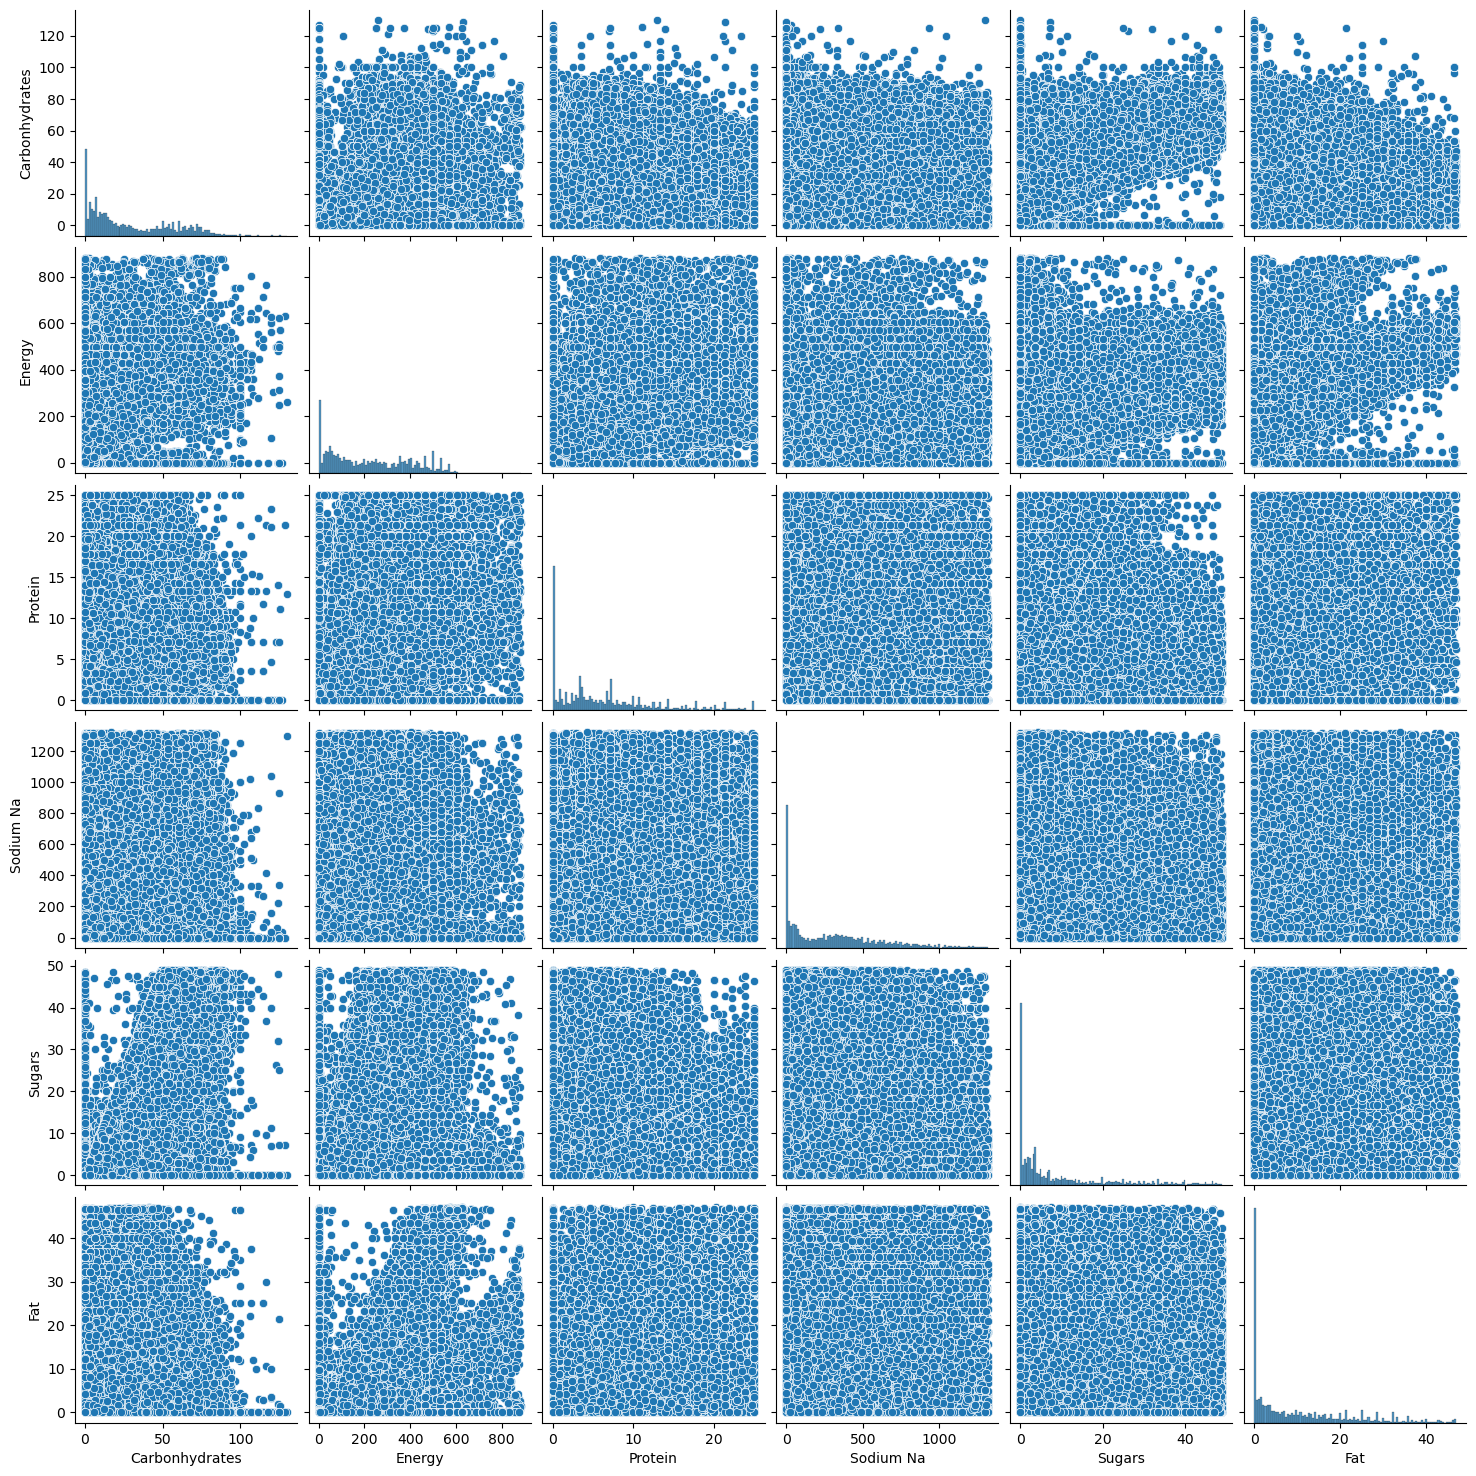

In [22]:
# #pairplot between nutrients and Energy inside food_data
sns.pairplot(food_data[['Carbonhydrates','Energy','Protein', 'Sodium Na','Sugars','Fat']])

array([[<Axes: title={'center': 'fdc_id'}>,
        <Axes: title={'center': 'Carbonhydrates'}>,
        <Axes: title={'center': 'Energy'}>],
       [<Axes: title={'center': 'Protein'}>,
        <Axes: title={'center': 'Sodium Na'}>,
        <Axes: title={'center': 'Sugars'}>],
       [<Axes: title={'center': 'Fat'}>, <Axes: >, <Axes: >]],
      dtype=object)

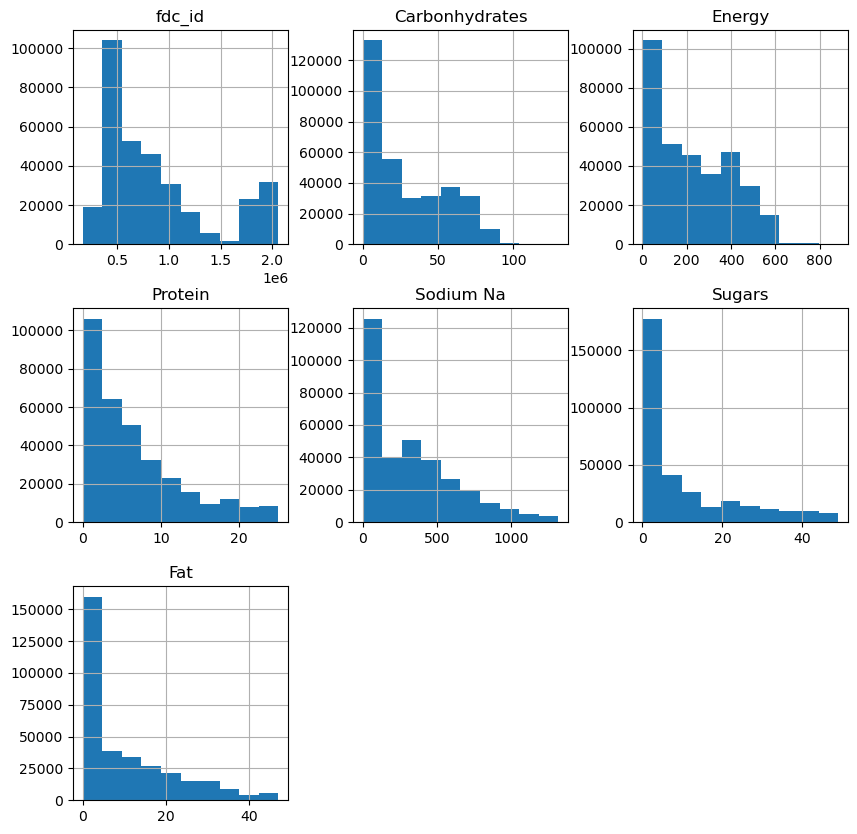

In [24]:
#histogram of the nutrients in food_type 
food_data.hist(figsize=(10,10))

<Axes: >

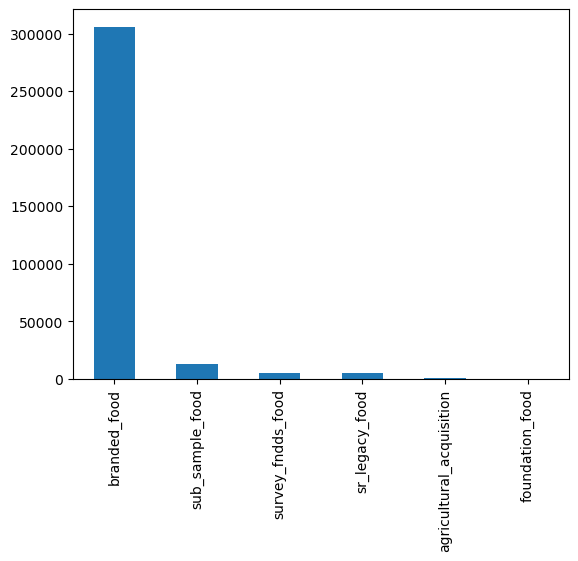

In [26]:
#count each number of data_type
food_data['Data_type'].value_counts().plot(kind='bar')

In [27]:
food_data.keys()

Index(['fdc_id', 'Carbonhydrates', 'Energy', 'Protein', 'Sodium Na', 'Sugars',
       'Fat', 'Data_type', 'Description', 'Publication_date'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix of Nutrients and Energy')

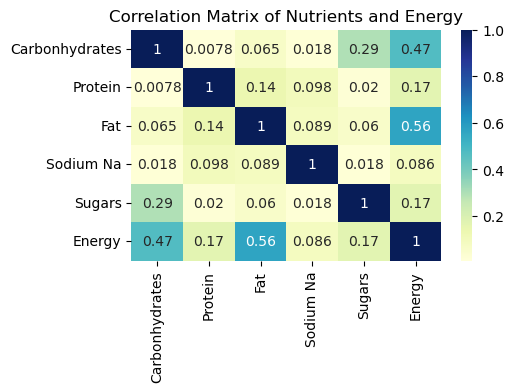

In [30]:
fig = plt.figure(figsize=(5,3))
corr_matrix = food_data[['Carbonhydrates','Protein','Fat','Sodium Na','Sugars','Energy']].corr()**2
#with gradient warm color 
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix of Nutrients and Energy')


In [31]:
# save foos_data to csv
food_data.to_csv('food_data.csv', index=False)


In [ ]:
# stacked bar plot of carbonhydrates, protein, fat, sodium, sugars, energy in foodtype
food_data[['Carbonhydrates','Protein','Fat','Sodium Na','Sugars','Energy']].plot(kind='bar', stacked=True, figsize=(10,5))  

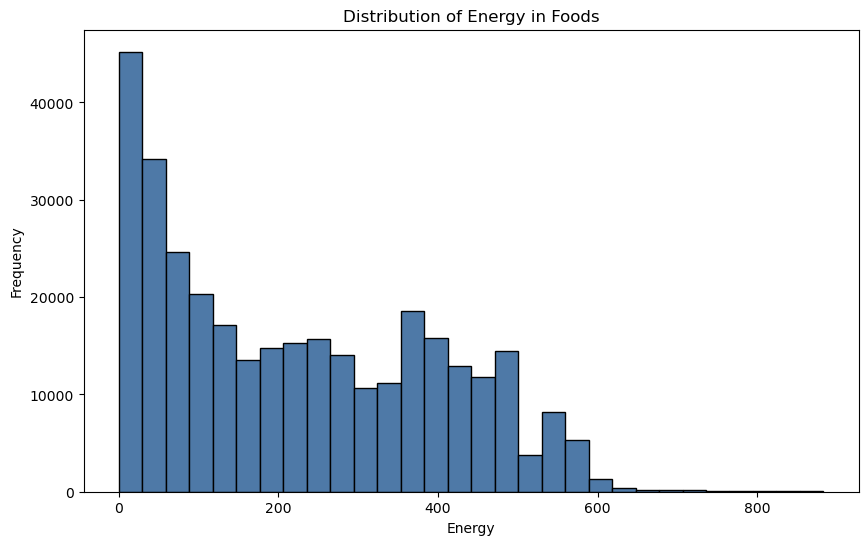

In [36]:

plt.figure(figsize=(10, 6))
plt.hist(food_data['Energy'], bins=30, color='#4E79A7', edgecolor='black')
plt.title('Distribution of Energy in Foods')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.show()


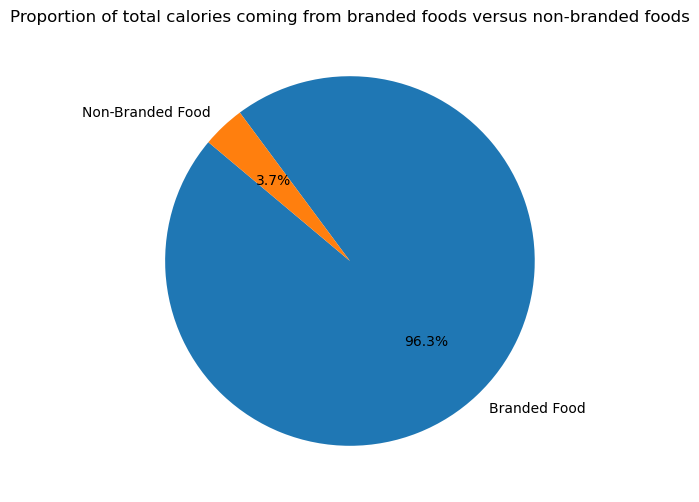

In [ ]:
#Show the proportion of total calories coming from branded foods versus non-branded foods.

branded_food = food_data[food_data['Data_type'].str.contains('branded_food')]
non_branded_food = food_data[~food_data['Data_type'].str.contains('branded_food')]
total_energy = food_data['Energy'].sum()
#Total Energy from Branded food
total_energy_branded = branded_food['Energy'].sum()
#Total Energy from Non-Branded food
total_energy_non_branded = non_branded_food['Energy'].sum()
#Proportion of total calories coming from branded foods
proportion_branded = total_energy_branded/total_energy
#Proportion of total calories coming from non-branded foods
proportion_non_branded = total_energy_non_branded/total_energy
#Proportion of total calories coming from branded foods versus non-branded foods
proportion_branded, proportion_non_branded
#pie chart
plt.figure(figsize=(10, 6))
plt.pie([proportion_branded, proportion_non_branded], labels=['Branded Food', 'Non-Branded Food'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of total Energy coming from branded foods versus non-branded foods')
plt.show()



In [37]:
food_data

,fdc_id,Carbonhydrates,Energy,Protein,Sodium Na,Sugars,Fat,Data_type,Description,Publication_date
0,167512,41.18,796.5,5.88,1059.0,5.88,13.24,sr_legacy_food,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",2019-04-01
1,167513,53.42,855.5,4.34,780.0,21.34,11.27,sr_legacy_food,"Pillsbury, Cinnamon Rolls with Icing, refriger...",2019-04-01
3,167515,46.00,602.0,8.00,345.0,0.00,1.80,sr_legacy_food,"George Weston Bakeries, Thomas English Muffins",2019-04-01
4,167516,41.05,708.5,6.58,621.0,4.30,9.22,sr_legacy_food,"Waffles, buttermilk, frozen, ready-to-heat",2019-04-01
5,167517,48.39,800.0,7.42,710.0,4.41,9.49,sr_legacy_food,"Waffle, buttermilk, frozen, ready-to-heat, toa...",2019-04-01
...,...,...,...,...,...,...,...,...,...,...
408932,2058808,23.60,213.0,3.37,45.0,19.10,12.36,branded_food,"CHOCOLATE ICE CREAM, CHOCOLATE",2021-10-28
408933,2058817,30.23,186.0,3.49,99.0,22.09,5.81,branded_food,COOKIES & CREAM FLAVORED VANILLA FROZEN DAIRY ...,2021-10-28
408934,2058818,26.83,159.0,4.88,73.0,20.73,4.88,branded_food,"CHOCOLATE FROZEN DAIRY DESSERT, CHOCOLATE",2021-10-28
408935,2058821,24.44,200.0,0.00,128.0,20.00,10.00,branded_food,VANILLA BEAN FLAVORED VANILLA ICE CREAM WITH V...,2021-10-28
